In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv('customer_data.csv')

# Preview the first few rows
print("Original Dataset Preview:")
print(df.head())

Original Dataset Preview:
   Number   Age       Income  Spending_Score  Membership_Years  \
0     1.0  56.0  61350.84215    12372.864450              15.0   
1     2.0  46.0  53777.18224    11001.604230              10.0   
2     3.0  32.0  39460.32263     8007.385018              19.0   
3     4.0  60.0  66672.12210    13526.548370              12.0   
4     5.0  38.0  44459.08553     9059.304083               9.0   

   Purchase_Frequency  Last_Purchase_Amount  
0           77.685590           6232.122440  
1           51.858351           5545.849698  
2           98.166371           4054.645293  
3           62.530976           6815.544393  
4           46.470533           4617.833484  


In [21]:
missing_values = df.isnull().sum()
print("\nMissing Values Summary:")
print(missing_values)

# Handling missing values by replacing with the mean (for numerical columns)
df.fillna(df.mean(), inplace=True)


Missing Values Summary:
Number                  3
Age                     6
Income                  0
Spending_Score          2
Membership_Years        6
Purchase_Frequency      1
Last_Purchase_Amount    3
dtype: int64


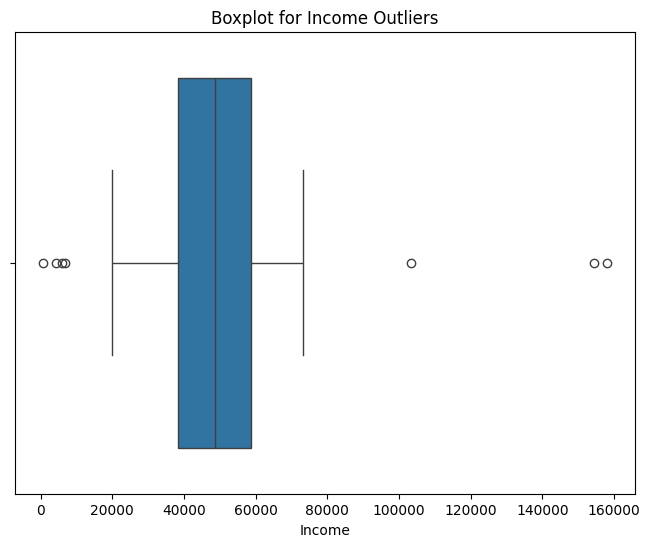

In [22]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Income'])
plt.title("Boxplot for Income Outliers")
plt.show()

In [23]:
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1

# Filtering outliers
df_clean = df[~((df['Income'] < (Q1 - 1.5 * IQR)) | (df['Income'] > (Q3 + 1.5 * IQR)))]

In [24]:
print("\nCleaned Dataset (After Removing Outliers):")
print(df_clean.describe())


Cleaned Dataset (After Removing Outliers):
            Number          Age        Income  Spending_Score  \
count  1355.000000  1355.000000   1355.000000     1355.000000   
mean    682.023387    43.182592  48263.893295     9757.041728   
std     393.575138    12.502028  12646.758869     2530.150040   
min       1.000000    18.000000  19946.675740     4064.177336   
25%     341.500000    33.000000  38490.993535     7828.762727   
50%     682.000000    43.000000  48656.136620     9836.057504   
75%    1022.500000    53.500000  58523.300895    11804.784275   
max    1362.000000    64.000000  73182.569800    14791.611800   

       Membership_Years  Purchase_Frequency  Last_Purchase_Amount  
count       1355.000000         1355.000000           1355.000000  
mean           9.515240           49.532653           4927.312018  
std            5.399473           27.032112           1265.093332  
min            1.000000            4.876052           2057.551913  
25%            5.000000       

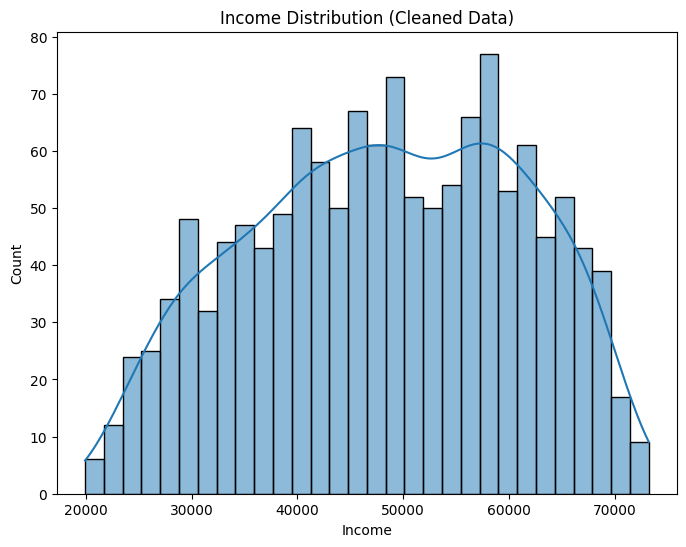

In [25]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df_clean, x='Income', bins=30, kde=True)
plt.title("Income Distribution (Cleaned Data)")
plt.show()